In [163]:
from __future__ import division

from cmath import *
from math import radians
from numpy import arange
from numpy import divide

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

%matplotlib inline

### Constants

In [154]:
# refraction indices
n1 = 1                    # air
n2 = 1.99 + 1j * 4.1114   # Ni
n3 = 3.85 + 1j * 0.02     # Si

# n2 = 2.2129 + 1j * 4.1710  #Co
# n3 = 3.4434                # Si

# wavelength (in nm)
l = 633

### Auxiliary functions

In [155]:
# refraction angle
def theta_func(na, nb, thetaa):
    return asin( na * sin(thetaa) / nb )

# p-reflectivity
def rp_func(na, nb, thetaa):
    thetab = theta_func(na, nb, thetaa)
    rpab = (nb*cos(thetaa) - na*cos(thetab)) / (nb*cos(thetaa) + na*cos(thetab))
    return rpab

# s-reflectivity
def rs_func(na, nb, thetaa):
    thetab = theta_func(na, nb, thetaa)
    rsab = (na*cos(thetaa) - nb*cos(thetab)) / (na*cos(thetaa) + nb*cos(thetab))
    return rsab

# reflectivity of the film
def r_func(r12, r23, gamma):
    return (r12 + r23*exp(2j*gamma))/(1 + r12*r23*exp(2j*gamma))

### Reflectivities function

In [156]:
def ref_func(d, theta):
    
    # incidence angles (in radians)
    theta1 = radians(theta)
    theta2 = theta_func(n1, n2, theta1)
    theta3 = theta_func(n1, n3, theta1)

    # gamma
    gamma = 2 * pi * n2 *cos(theta2) * d / l
    
    # p-reflectivities
    rp12 = rp_func(n1, n2, theta1)
    rp23 = rp_func(n2, n3, theta2)
    rp13 = rp_func(n1, n3, theta1)
    
    # s-reflectivities
    rs12 = rs_func(n1, n2, theta1)
    rs23 = rs_func(n2, n3, theta2)
    rs13 = rs_func(n1, n3, theta1)
    
    # reference reflectivities
    rp0 = rp13
    rs0 = rs13

    # total reflectivities
    rp = r_func(rp12, rp23, gamma)
    rs = r_func(rs12, rs23, gamma)
    
    return rs, rp

### Calculation

In [157]:
d = 1
theta = 45

rs, rp = ref_func(d, theta)

In [145]:
print 'rp =', '{0:.4f}'.format(rp)
print 'rs =', '{0:.4f}'.format(rs), '\n'
print 'phase(rp) =', '{0:.4f}'.format(phase(rp))
print 'phase(rs) =', '{0:.4f}'.format(phase(rs)), '\n'
print 'abs(rp) =', '{0:.4f}'.format(abs(rp))
print 'abs(rs) =', '{0:.4f}'.format(abs(rs))

rp = 0.4852+0.0290j
rs = -0.6966-0.0197j 

phase(rp) = 0.0596
phase(rs) = -3.1133 

abs(rp) = 0.4861
abs(rs) = 0.6969


## Range of angles
### Reflectivities

In [146]:
d = 1

tmin = 0
tmax = 90
dt = 0.01

tlist = arange(tmin, tmax + dt, dt)

rsRe = []
rsIm = []
rpRe = []
rpIm = []

for t in tlist:
    rs, rp = ref_func(d, t)
    
    rsRe.append(rs.real)
    rsIm.append(rs.imag)
    
    rpRe.append(rp.real)
    rpIm.append(rp.imag)

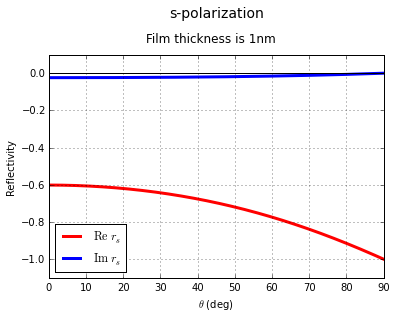

In [147]:
plt.plot(tlist, rsRe, lw = 3, color = 'r', label = r'$\operatorname{Re}\ r_s$')
plt.plot(tlist, rsIm, lw = 3, color = 'b', label = r'$\operatorname{Im}\ r_s$')

plt.ylim((-1.1, 0.1))
plt.axhline(y = 0, color = 'k')
plt.grid()
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel('Reflectivity')

plt.legend(loc = 3)

plt.title('s-polarization\n\n', fontsize = 14)
plt.suptitle('Film thickness is ' + str(d) +  'nm', fontsize = 12)

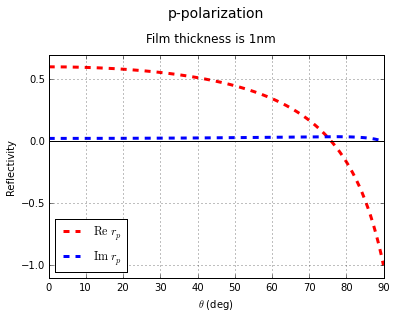

In [148]:
# plt.plot(tlist, rpRe, lw = 3, color = 'r', alpha = 0.2)
# plt.plot(tlist, rpIm, lw = 3, color = 'b', alpha = 0.2)
plt.plot(tlist, rpRe, lw = 3, color = 'r', label = r'$\operatorname{Re}\ r_p$', ls = '--')
plt.plot(tlist, rpIm, lw = 3, color = 'b', label = r'$\operatorname{Im}\ r_p$', ls = '--')

plt.ylim((-1.1, 0.7))
plt.axhline(y = 0, color = 'k')
plt.grid()
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel('Reflectivity')

plt.legend(loc = 3)

plt.title('p-polarization\n\n', fontsize = 14)
plt.suptitle('Film thickness is ' + str(d) +  'nm', fontsize = 12)

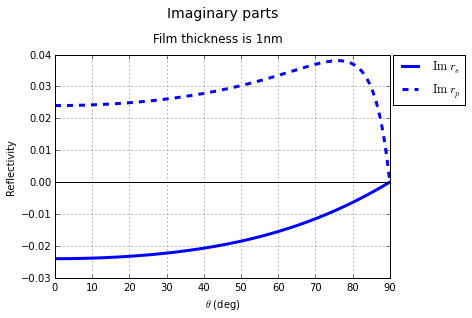

In [149]:
plt.plot(tlist, rsIm, lw = 3, color = 'b', label = r'$\operatorname{Im}\ r_s$')
# plt.plot(tlist, rpIm, lw = 3, color = 'b', alpha = 0.2)
plt.plot(tlist, rpIm, lw = 3, color = 'b', label = r'$\operatorname{Im}\ r_p$', ls = '--')

# plt.ylim((-1.1, 0.7))
plt.axhline(y = 0, color = 'k')
plt.grid()
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel('Reflectivity')

plt.legend(bbox_to_anchor=(1.01, 1), loc = 2, borderaxespad = 0)

plt.title('Imaginary parts\n\n', fontsize = 14)
plt.suptitle('Film thickness is ' + str(d) +  'nm', fontsize = 12)

# Reflectances

In [158]:
d = 1

tmin = 0
tmax = 90
dt = 0.01

tlist = arange(tmin, tmax + dt, dt)

rs_abs_2 = []
rp_abs_2 = []

for t in tlist:
    rs, rp = ref_func(d, t)
    
    rs_abs_2.append(abs(rs)**2)
    rp_abs_2.append(abs(rp)**2)

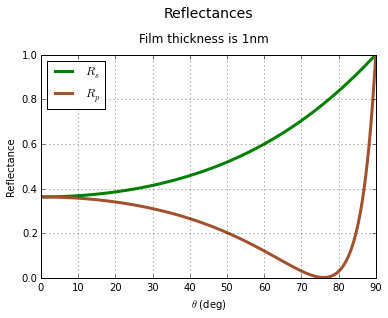

In [187]:
plt.plot(tlist, rs_abs_2, lw = 3, color = 'green', label = r'$R_s$')
plt.plot(tlist, rp_abs_2, lw = 3, color = 'sienna', label = r'$R_p$')

# plt.ylim((-1.1, 0.1))
plt.axhline(y = 0, color = 'k')
plt.grid()
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel('Reflectance')

plt.legend(loc = 2)

plt.title('Reflectances\n\n', fontsize = 14)
plt.suptitle('Film thickness is ' + str(d) +  'nm', fontsize = 12)

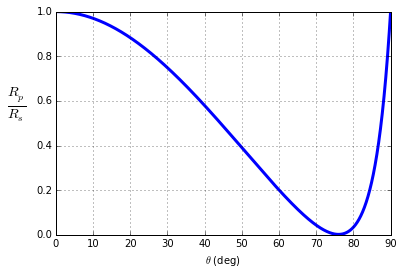

In [186]:
plt.plot(tlist, divide(rp_abs_2, rs_abs_2), lw = 3, color = 'b')

# plt.ylim((0, 0.05))
# plt.xlim((79, 81))
plt.axhline(y = 0, color = 'k')
plt.grid()
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\frac{R_p}{R_s}$', rotation = 'horizontal', fontsize = 20, labelpad = 20)

# plt.legend(loc = 2)

In [177]:
4.8/113

0.04247787610619469